## Начало лабораторной

Выгрузка данных из csv файла в датафрейм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(".//static//csv//ds_salaries.csv")
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


Посмотрим краткое содержание датасета. Видим, что датасет состоит из 3755 строк и 11 столбцов

In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

Построение диаграмм

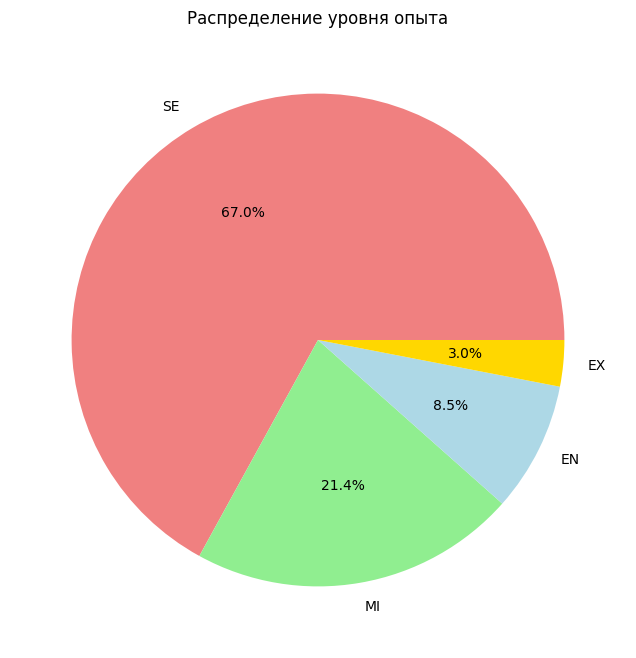

In [6]:
experience_counts = df['experience_level'].value_counts()

plt.figure(figsize=(8, 8))
experience_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue', 'gold'])
plt.title('Распределение уровня опыта')
plt.ylabel('')
plt.show()

Данная диаграмма отображает распределения уровня опыта

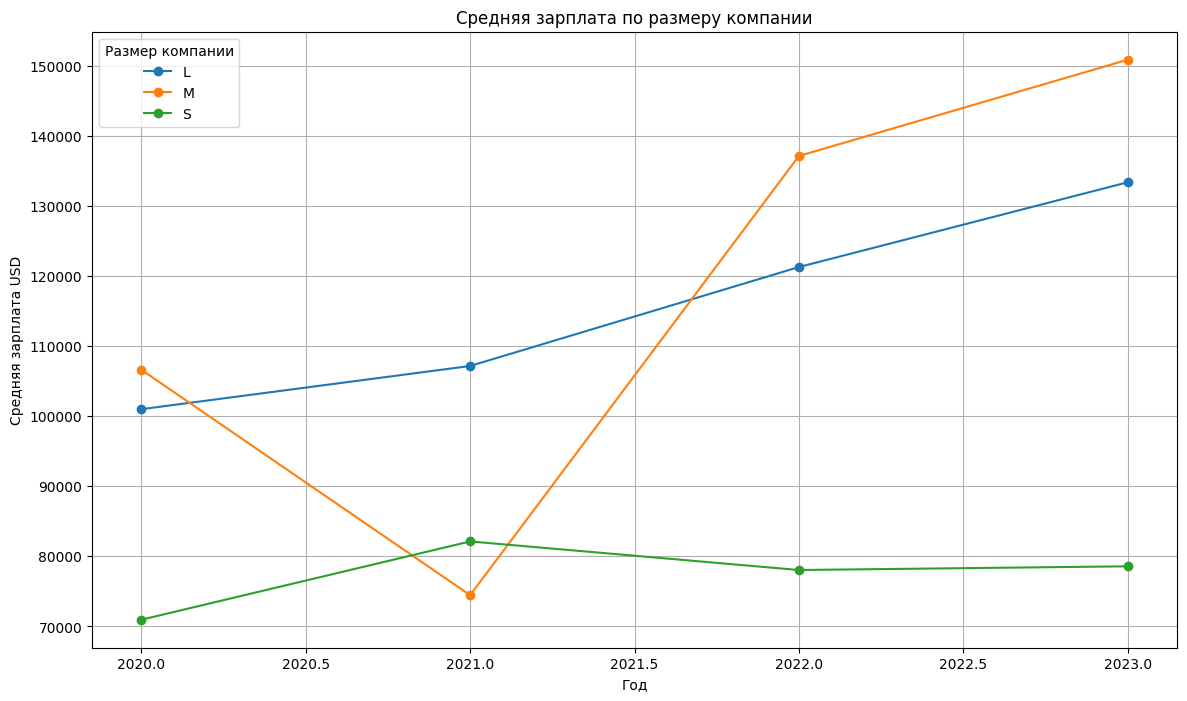

In [7]:
salary_by_company_size = df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack()

salary_by_company_size.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Средняя зарплата по размеру компании')
plt.xlabel('Год')
plt.ylabel('Средняя зарплата USD')
plt.xticks(rotation=0)
plt.legend(title='Размер компании')
plt.grid(True)
plt.show()

Данная диаграмма показывает средние зарплаты исходя из размеров компании по годам

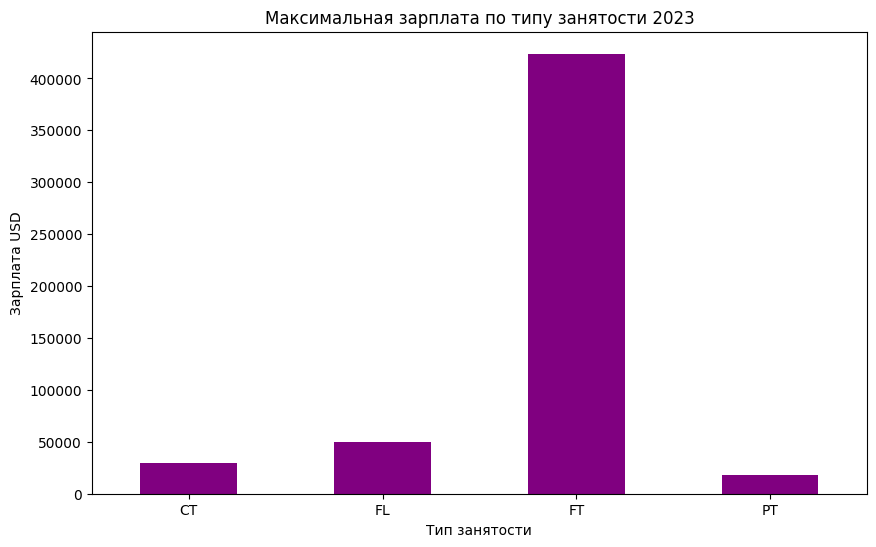

In [9]:
df_slice = df.iloc[1:3753]
last_years = df_slice['work_year'].max()
df_filtr = df_slice[df_slice['work_year'] == last_years]
salary_by_employment_type = df_filtr.groupby('employment_type')['salary_in_usd'].max()

plt.figure(figsize=(10, 6))
salary_by_employment_type.plot(kind='bar', color='purple')
plt.title(f'Максимальная зарплата по типу занятости {last_years}')
plt.xlabel('Тип занятости')
plt.ylabel('Зарплата USD')
plt.xticks(rotation=0)
plt.show()

Данная диаграмма показывает максимальную зарплату исходя из типа занятости за последний год (не учитывая первую и последнюю строки датасета)